In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

df = pd.read_csv('adult.csv')

In [2]:
def clean_data(df):
    df = df.copy()
    df = df.replace('?', np.nan)
    
    df['workclass'] = df['workclass'].fillna(df['workclass'].mode()[0])
    df['occupation'] = df['occupation'].fillna(df['occupation'].mode()[0])
    df['native.country'] = df['native.country'].fillna('United-States')
    
    le = LabelEncoder()
    categorical_cols = ['workclass', 'education', 'marital.status', 'occupation', 
                       'relationship', 'race', 'sex', 'native.country', 'income']
    
    for col in categorical_cols:
        df[col] = le.fit_transform(df[col])
    
    return df

df_cleaned = clean_data(df)
print(df_cleaned.head())

   age  workclass  fnlwgt  education  education.num  marital.status  \
0   90          3   77053         11              9               6   
1   82          3  132870         11              9               6   
2   66          3  186061         15             10               6   
3   54          3  140359          5              4               0   
4   41          3  264663         15             10               5   

   occupation  relationship  race  sex  capital.gain  capital.loss  \
0           9             1     4    0             0          4356   
1           3             1     4    0             0          4356   
2           9             4     2    0             0          4356   
3           6             4     4    0             0          3900   
4           9             3     4    0             0          3900   

   hours.per.week  native.country  income  
0              40              38       0  
1              18              38       0  
2              40   

In [3]:
X = df_cleaned.drop(['income', 'education'], axis=1) 
y = df_cleaned['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (26048, 13)
Testing set shape: (6513, 13)


In [4]:
mlp = MLPClassifier(
    hidden_layer_sizes=(10, 5),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    batch_size='auto',
    learning_rate_init=0.001,
    max_iter=300,
    random_state=42,
    verbose=True
)

mlp.fit(X_train_scaled, y_train)


Iteration 1, loss = 0.86754835
Iteration 2, loss = 0.56811448
Iteration 3, loss = 0.45216144
Iteration 4, loss = 0.41269804
Iteration 5, loss = 0.39527435
Iteration 6, loss = 0.38358830
Iteration 7, loss = 0.37419097
Iteration 8, loss = 0.36607480
Iteration 9, loss = 0.35893728
Iteration 10, loss = 0.35289973
Iteration 11, loss = 0.34796490
Iteration 12, loss = 0.34399651
Iteration 13, loss = 0.34037828
Iteration 14, loss = 0.33739541
Iteration 15, loss = 0.33500660
Iteration 16, loss = 0.33325505
Iteration 17, loss = 0.33173482
Iteration 18, loss = 0.33062325
Iteration 19, loss = 0.32944955
Iteration 20, loss = 0.32859287
Iteration 21, loss = 0.32765744
Iteration 22, loss = 0.32684992
Iteration 23, loss = 0.32613218
Iteration 24, loss = 0.32537366
Iteration 25, loss = 0.32472031
Iteration 26, loss = 0.32415896
Iteration 27, loss = 0.32345133
Iteration 28, loss = 0.32304155
Iteration 29, loss = 0.32245737
Iteration 30, loss = 0.32192631
Iteration 31, loss = 0.32157432
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=300, random_state=42,
              verbose=True)

Hidden Layers: 2 layers (10 neurons in the first, 5 in the second)
Iterations: Trains for up to 300 epochs
Reproducibility: Fixed random seed (random_state=42)
Training Logs: Enabled (verbose=True)
Defaults Used: ReLU activation, Adam optimizer, learning rate = 0.001

In [5]:
y_pred = mlp.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Accuracy: 0.8535

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4976
           1       0.73      0.60      0.66      1537

    accuracy                           0.85      6513
   macro avg       0.81      0.77      0.78      6513
weighted avg       0.85      0.85      0.85      6513


Confusion Matrix:
[[4638  338]
 [ 616  921]]


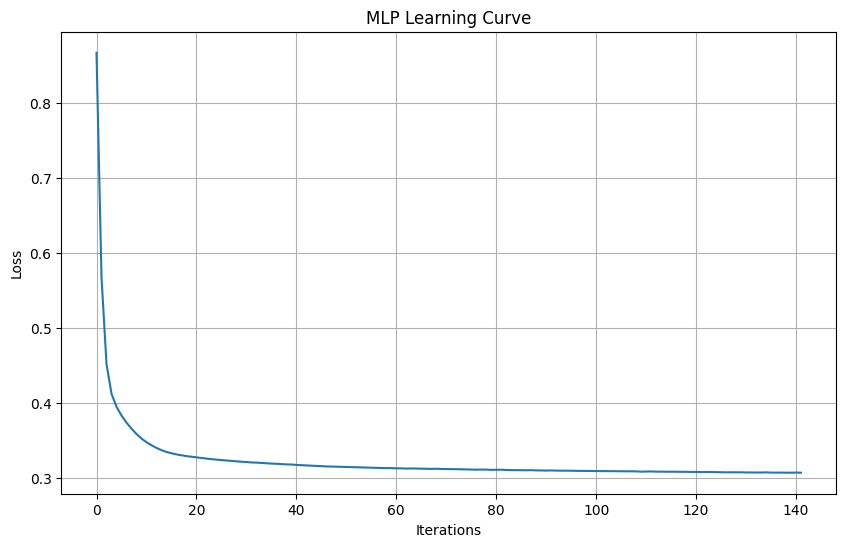

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(mlp.loss_curve_)
plt.title('MLP Learning Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

Y-axis (Loss): Measures the error in prediction; lower values indicate better performance.
X-axis (Iterations): Represents the number of training iterations.
Curve Behavior:
The loss starts high and drops steeply at the beginning, indicating rapid learning.
After the initial drop, the curve flattens, showing slower improvement.
The model appears to converge after around 100-140 iterations, meaning additional training may not significantly improve performance.